In [18]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.reg_strength = 1e-5
    
    def Cost(self, W, X, y):
        # calculate hinge loss
        W = self.w
        N = X.shape[0]
        distances = 1 - y * (np.dot(X, W))
        distances[distances < 0] = 0  # equivalent to max(0, distance)
        hinge_loss = self.reg_strength * (np.sum(distances) / N)

        # calculate cost
        cost = 1 / 2 * np.dot(W, W) + hinge_loss
        return cost
    
    def f(self, x):
        return np.dot(x, self.w) - self.b
    
    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_shapes, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * self.f(x_i) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                

    def predict(self, X):
        y_pred = np.dot(X, self.w) - self.b
        return np.sign(y_pred)

In [19]:
from sklearn import datasets
import numpy as np 
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [21]:
svm = SVM(n_iters=1000, learning_rate=0.01)
svm.fit(X_train, y_train)

In [22]:
y_pred = svm.predict(X_test)
y_pred

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

[0.58977016 0.17946483] -0.1520000000000001
0.19001826132672903


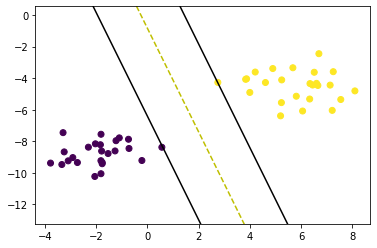

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)
print(clf.Cost(clf.w, X, y))

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()

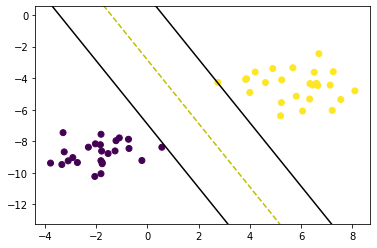

In [25]:
def visualize_my_svm():
    def get_hyperplane_value_2(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value_2(x0_1, svm.w, svm.b, 0)
    x1_2 = get_hyperplane_value_2(x0_2, svm.w, svm.b, 0)

    x1_1_m = get_hyperplane_value_2(x0_1, svm.w, svm.b, -1)
    x1_2_m = get_hyperplane_value_2(x0_2, svm.w, svm.b, -1)

    x1_1_p = get_hyperplane_value_2(x0_1, svm.w, svm.b, 1)
    x1_2_p = get_hyperplane_value_2(x0_2, svm.w, svm.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_my_svm()